In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import datetime
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.colors import from_levels_and_colors
from matplotlib.colors import TwoSlopeNorm
from cartopy.util import add_cyclic_point
import cartopy as cart
import seaborn as sns
from scipy import signal
from scipy.ndimage import uniform_filter1d

In [2]:
# Load data
tas_NH = xr.open_dataset('slo0042+slo0046+slo0050_echam6_BOT_mm_1001_8850_167_NH_ymean_fldmean.nc')
tas_NH_nv = xr.open_dataset('novolc/slo0043_echam6_BOT_mm_1001-8850_167_NH_ymean_fldmean.nc')

tas_NH_seas = xr.open_dataset('slo0042+slo0046+slo0050_echam6_BOT_mm_1001_8850_167_NH_seas_fldmean.nc')
tas_NH_seas_nv = xr.open_dataset('novolc/slo0043_echam6_BOT_mm_1001-8850_167_NH_seas_fldmean.nc')

aod = xr.open_dataset('forcing/eva_holo2.2_aod_550nm_echam_T63_sw_1001_8850_ym.nc')
sf = pd.read_csv('forcing/TSI_14C_cycle_yearly_cmip_v20160322_-6757-1849.csv')

In [3]:
Kauf = pd.read_csv('Kaufman2020_Kuafmann2022.csv')

In [4]:
tas_Arc = xr.open_dataset('slo0042+slo0046+slo0050_echam6_BOT_mm_1001_8850_167_Arc_ym_fm.nc')
tas_Arc_seas = xr.open_dataset('slo0042+slo0046+slo0050_echam6_BOT_mm_1001_8850_167_Arc_seas_fm.nc')


In [5]:
# Split seasons
tas_NH_DJF = tas_NH_seas['var167'][0::4,:,:]
tas_NH_JJA = tas_NH_seas['var167'][2::4,:,:]

tas_NH_DJF_nv = tas_NH_seas_nv['var167'][0::4,:,:]
tas_NH_JJA_nv = tas_NH_seas_nv['var167'][2::4,:,:]

In [6]:
tas_Arc_DJF = tas_Arc_seas['var167'][0::4,:,:]
tas_Arc_JJA = tas_Arc_seas['var167'][2::4,:,:]


In [7]:
# Create time array
from skyfield import api
ts = api.load.timescale()
time = ts.tt(range(-6000, 1850)) 
time = time.tt_calendar()[0]

In [10]:
# Calculate anomalies wrt last 100 years

tas_ym_a = tas_NH['var167'][:,0,0] - np.mean(tas_NH['var167'][-100:,0,0])
tas_DJF_a = tas_NH_DJF[:,0,0] - np.mean(tas_NH_DJF[-100:,0,0])
tas_JJA_a = tas_NH_JJA[:,0,0] - np.mean(tas_NH_JJA[-100:,0,0])

tas_Arc_ym_a = tas_Arc['var167'][:,0,0] - np.mean(tas_Arc['var167'][-100:,0,0])
tas_Arc_DJF_a = tas_Arc_DJF[:,0,0] - np.mean(tas_Arc_DJF[-100:,0,0])
tas_Arc_JJA_a = tas_Arc_JJA[:,0,0] - np.mean(tas_Arc_JJA[-100:,0,0])

In [11]:
# 100-year mean
tas_ym_a_100ym = uniform_filter1d(tas_ym_a, size=100, axis=0, origin=0)
tas_JJA_a_100ym = uniform_filter1d(tas_JJA_a, size=100, axis=0, origin=0)
tas_DJF_a_100ym = uniform_filter1d(tas_DJF_a, size=100, axis=0, origin=0)

tas_Arc_ym_a_100ym = uniform_filter1d(tas_Arc_ym_a, size=100, axis=0, origin=0)
tas_Arc_JJA_a_100ym = uniform_filter1d(tas_Arc_JJA_a, size=100, axis=0, origin=0)
tas_Arc_DJF_a_100ym = uniform_filter1d(tas_Arc_DJF_a, size=100, axis=0, origin=0)

In [12]:
# Take 1-1800 CE as ref for anomaly
# tas NH
tas_ym_a2 = tas_NH['var167'][:,0,0] - np.mean(tas_NH['var167'][-1850:,0,0])
tas_DJF_a2 = tas_NH_DJF[:,0,0] - np.mean(tas_NH_DJF[-1850:,0,0])
tas_JJA_a2 = tas_NH_JJA[:,0,0] - np.mean(tas_NH_JJA[-1850:,0,0])

# Arctic
tas_Arc_ym_a2 = tas_Arc['var167'][:,0,0] - np.mean(tas_Arc['var167'][-1850:,0,0])
tas_Arc_DJF_a2 = tas_Arc_DJF[:,0,0] - np.mean(tas_Arc_DJF[-1850:,0,0])
tas_Arc_JJA_a2 = tas_Arc_JJA[:,0,0] - np.mean(tas_Arc_JJA[-1850:,0,0])

In [13]:
# Recalculate anomalies Kaufman
Kauf_mean_a2 = Kauf['NH(0-90°N)_median'] - np.mean(Kauf['NH(0-90°N)_median'][1:20])
Kauf_5_a2 = Kauf['NH(0-90°N)_5'] - np.mean(Kauf['NH(0-90°N)_5'][1:20])
Kauf_95_a2 = Kauf['NH(0-90°N)_95'] - np.mean(Kauf['NH(0-90°N)_95'][1:20])

Kauf_Arc_mean_a2 = Kauf[' 60N_to_90N_median'] - np.mean(Kauf[' 60N_to_90N_median'][1:20])
Kauf_Arc_5_a2 = Kauf[' 60N_to_90N_5'] - np.mean(Kauf[' 60N_to_90N_5'][1:20])
Kauf_Arc_95_a2 = Kauf[' 60N_to_90N_95'] - np.mean(Kauf[' 60N_to_90N_95'][1:20])

In [14]:
# 100-year mean
tas_ym_a2_100ym = uniform_filter1d(tas_ym_a2, size=100, axis=0, origin=0)
tas_JJA_a2_100ym = uniform_filter1d(tas_JJA_a2, size=100, axis=0, origin=0)
tas_DJF_a2_100ym = uniform_filter1d(tas_DJF_a2, size=100, axis=0, origin=0)

tas_Arc_ym_a2_100ym = uniform_filter1d(tas_Arc_ym_a2, size=100, axis=0, origin=0)
tas_Arc_JJA_a2_100ym = uniform_filter1d(tas_Arc_JJA_a2, size=100, axis=0, origin=0)
tas_Arc_DJF_a2_100ym = uniform_filter1d(tas_Arc_DJF_a2, size=100, axis=0, origin=0)

In [15]:
np.mean(Kauf[' 60N_to_90N_median'][1:20])

0.3099157894736842

In [16]:
Kauf[' 60N_to_90N_median'][0:2]

0    0.0517
1    0.0000
Name:  60N_to_90N_median, dtype: float64

Text(0.5, 1.0, 'Boreal summer')

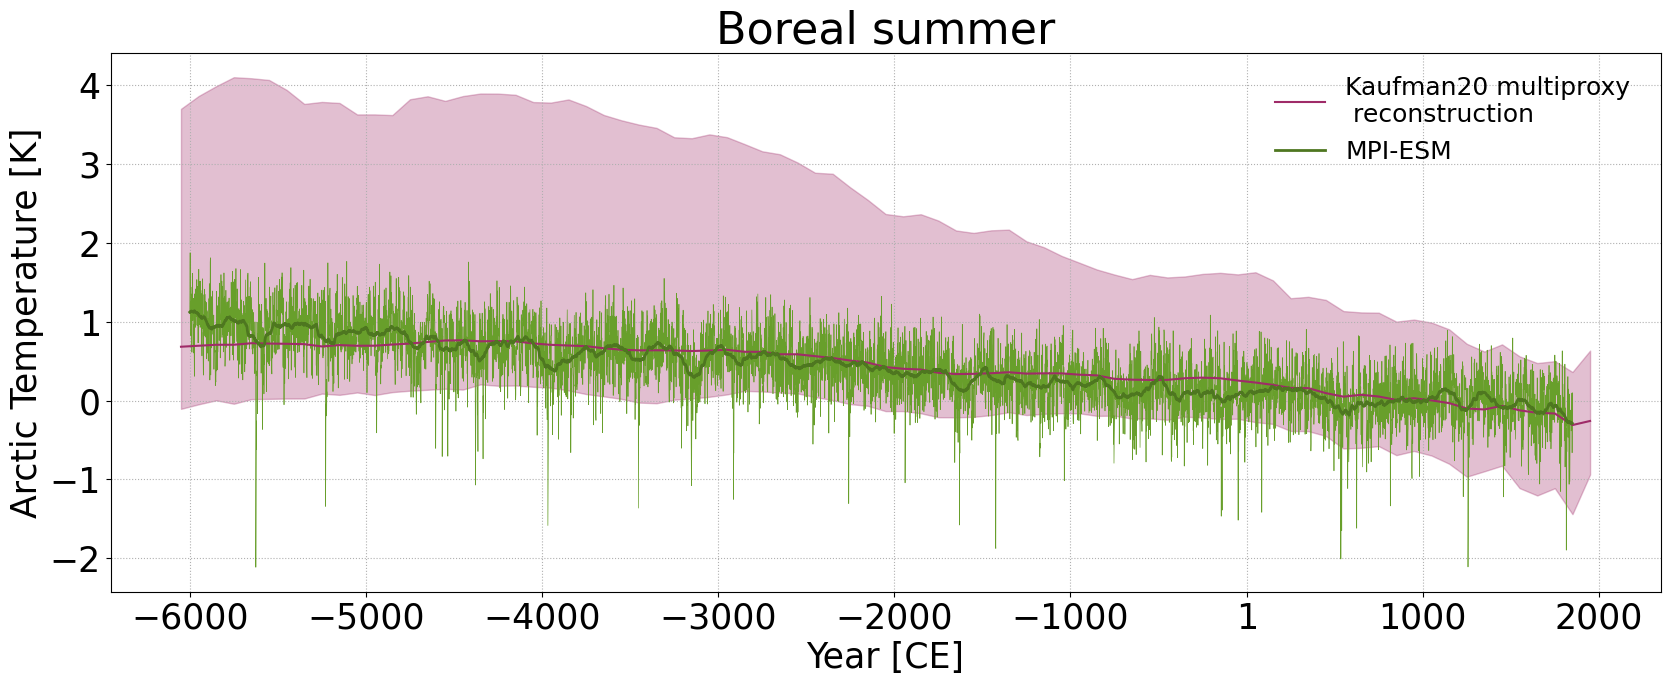

In [17]:
# Figure with reference period 1-1850 temperature anomaly Kaufman vs model

fig, axs = plt.subplots(1,figsize=(20,7))
fig.subplots_adjust(hspace = 0.3)

ax = plt.subplot(1,1,1)

#ax.plot(Kauf['Yeear BCE/CE'][:-40], Kauf[' 60N_to_90N_median'][:-40], linestyle='dashed', color = '#9F2B68', label = 'Kaufmann 2020')
ax.fill_between(Kauf['Yeear BCE/CE'][:-40], Kauf[' 60N_to_90N_5'][:-40]-0.3,Kauf[' 60N_to_90N_95'][:-40]-0.3, color = '#9F2B68', alpha=0.3)
ax.plot(time, tas_Arc_JJA_a2[:], color='#689f2b', linewidth=0.5)
ax.plot(Kauf['Yeear BCE/CE'][:-40], Kauf_Arc_mean_a2[:-40], color = '#9F2B68', label = 'Kaufman20 multiproxy \n reconstruction')
ax.plot(time, tas_Arc_JJA_a2_100ym[:], color='#4e7720', linewidth=2, label='MPI-ESM')

ax.grid(linestyle=':')

ax.set_ylabel('Arctic Temperature [K]', fontsize=25)
ax.tick_params(labelsize=25)
ax.set_xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])
ax.set_xlabel('Year [CE]', fontsize=25)

ax.legend(loc=1, fontsize=18, frameon=False)

ax.set_title('Boreal summer',fontsize=32)


#plt.savefig('figures/timeseries_tas_JJA_aCE-100_Kauf_Arctic_100ym.png', bbox_inches='tight')

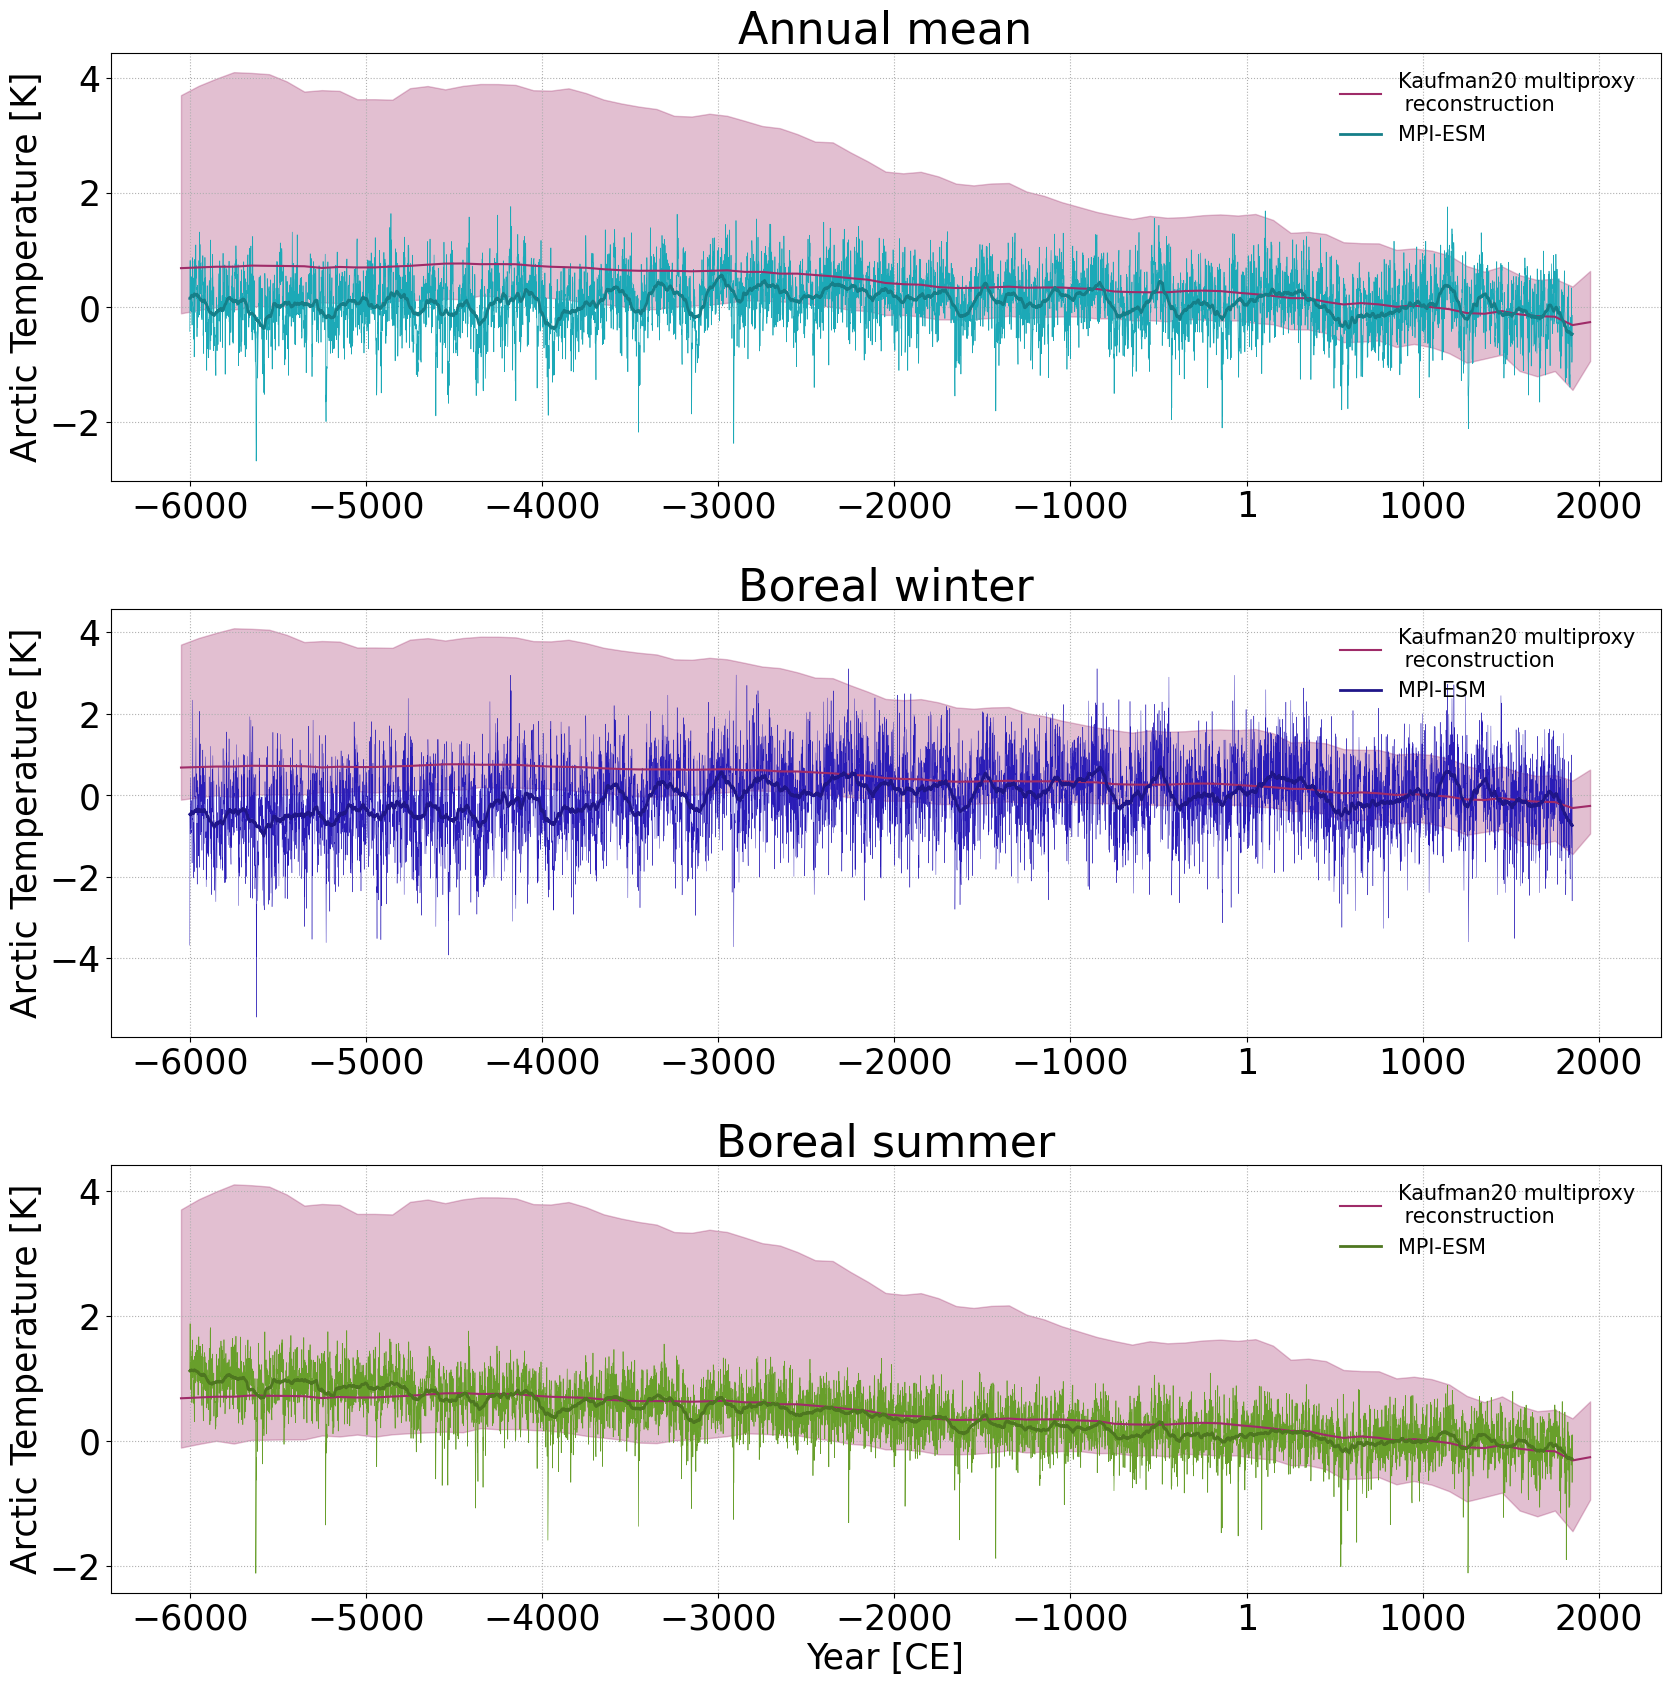

In [18]:
# Also for annual mean and DJF

fig, ax = plt.subplots(3,figsize=(20,20))
fig.subplots_adjust(hspace = 0.3)

ax[0].fill_between(Kauf['Yeear BCE/CE'][:-40], Kauf[' 60N_to_90N_5'][:-40]-0.3,Kauf[' 60N_to_90N_95'][:-40]-0.3, color = '#9F2B68', alpha=0.3)
ax[0].plot(time, tas_Arc_ym_a2[:], color='#1ca9b7', linewidth=0.5)
ax[0].plot(Kauf['Yeear BCE/CE'][:-40], Kauf_Arc_mean_a2[:-40], color = '#9F2B68', label = 'Kaufman20 multiproxy \n reconstruction')
ax[0].plot(time, tas_Arc_ym_a2_100ym[:], color='#157f89', linewidth=2, label='MPI-ESM')

ax[0].grid(linestyle=':')

ax[0].set_ylabel('Arctic Temperature [K]', fontsize=25)
ax[0].tick_params(labelsize=25)
ax[0].set_xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])
ax[0].legend(loc=1, fontsize=15, frameon=False)

ax[0].set_title('Annual mean',fontsize=32)


ax[1].fill_between(Kauf['Yeear BCE/CE'][:-40], Kauf[' 60N_to_90N_5'][:-40]-0.3,Kauf[' 60N_to_90N_95'][:-40]-0.3, color = '#9F2B68', alpha=0.3)
ax[1].plot(time, tas_Arc_DJF_a2[:-1], color='#2a1cb7', linewidth=0.3)
ax[1].plot(Kauf['Yeear BCE/CE'][:-40], Kauf_Arc_mean_a2[:-40], color = '#9F2B68', label = 'Kaufman20 multiproxy \n reconstruction')
ax[1].plot(time, tas_Arc_DJF_a2_100ym[:-1], color='#1f1589', linewidth=2, label = 'MPI-ESM')

ax[1].grid(linestyle=':')

ax[1].set_ylabel('Arctic Temperature [K]', fontsize=25)
ax[1].tick_params(labelsize=25)
ax[1].set_xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])
ax[1].legend(loc=1, fontsize=15, frameon=False)

ax[1].set_title('Boreal winter',fontsize=32)


ax[2].fill_between(Kauf['Yeear BCE/CE'][:-40], Kauf[' 60N_to_90N_5'][:-40]-0.3,Kauf[' 60N_to_90N_95'][:-40]-0.3, color = '#9F2B68', alpha=0.3)
ax[2].plot(time, tas_Arc_JJA_a2[:], color='#689f2b', linewidth=0.5)
ax[2].plot(Kauf['Yeear BCE/CE'][:-40], Kauf_Arc_mean_a2[:-40], color = '#9F2B68', label = 'Kaufman20 multiproxy \n reconstruction')
ax[2].plot(time, tas_Arc_JJA_a2_100ym[:], color='#4e7720', linewidth=2, label='MPI-ESM')

ax[2].grid(linestyle=':')

ax[2].set_ylabel('Arctic Temperature [K]', fontsize=25)
ax[2].tick_params(labelsize=25)
ax[2].set_xlabel('Year [CE]', fontsize=25)
ax[2].set_title('Boreal summer',fontsize=32)
ax[2].set_xticks([-6000,-5000,-4000,-3000,-2000,-1000,1,1000,2000])
ax[2].legend(loc=1, fontsize=15, frameon=False)


#plt.savefig('figures/timeseries_tas_ann_DJF_JJA_aCE-100_Kauf_Arctic_100ym.png', bbox_inches='tight')

In [19]:
# Model - tree ring comparison Büntgen data
Bun21 = pd.read_csv('../proxydata/Data_Buntgen2021_2.csv')

In [20]:
# Calculate anomaly
Bun21_a = Bun21['Rmean'] - np.mean(Bun21['Rmean'][-269:-169])

In [21]:
# calculate std
tas_JJA_a_std = np.std(tas_JJA_a[-1849:], axis=0)

In [22]:
# 200-year mean
tas_JJA_a_200yr = uniform_filter1d(tas_JJA_a,size=200, axis=0, origin = 0)
Bun21_a_200yr = uniform_filter1d(Bun21_a,size=200, origin = 0)

tas_JJA_200yr = uniform_filter1d(tas_NH_JJA,size=200, axis=0, origin = 0)
Bun21_200yr = uniform_filter1d(Bun21['Rmean'],size=200, origin = 0)

In [23]:
# Calculate anomaly after 200-year mean
tas_JJA_200yr_a = tas_JJA_200yr - np.mean(tas_JJA_200yr[-100:,0,0])
Bun21_200yr_a = Bun21_200yr - np.mean(Bun21_200yr[-269:-169])

In [24]:
# std
tas_JJA_a_200yr_std = np.std(tas_JJA_a_200yr[-1849:], axis=0)

In [25]:
# 10-year mean
tas_JJA_a_10yr = uniform_filter1d(tas_JJA_a,size=10, axis=0, origin = 0)
Bun21_a_10yr = uniform_filter1d(Bun21_a,size=10, origin = 0)

In [26]:
Bun21_a_10yr

array([-0.01266284, -0.02052708,  0.00548113, ...,         nan,
               nan,         nan])

In [27]:
# significance
tas_JJA_a_10yr_std = np.std(tas_JJA_a_10yr[-1849:], axis=0)
Bun21_a_10yr_std = np.mean(Bun21_a_10yr[:-169])

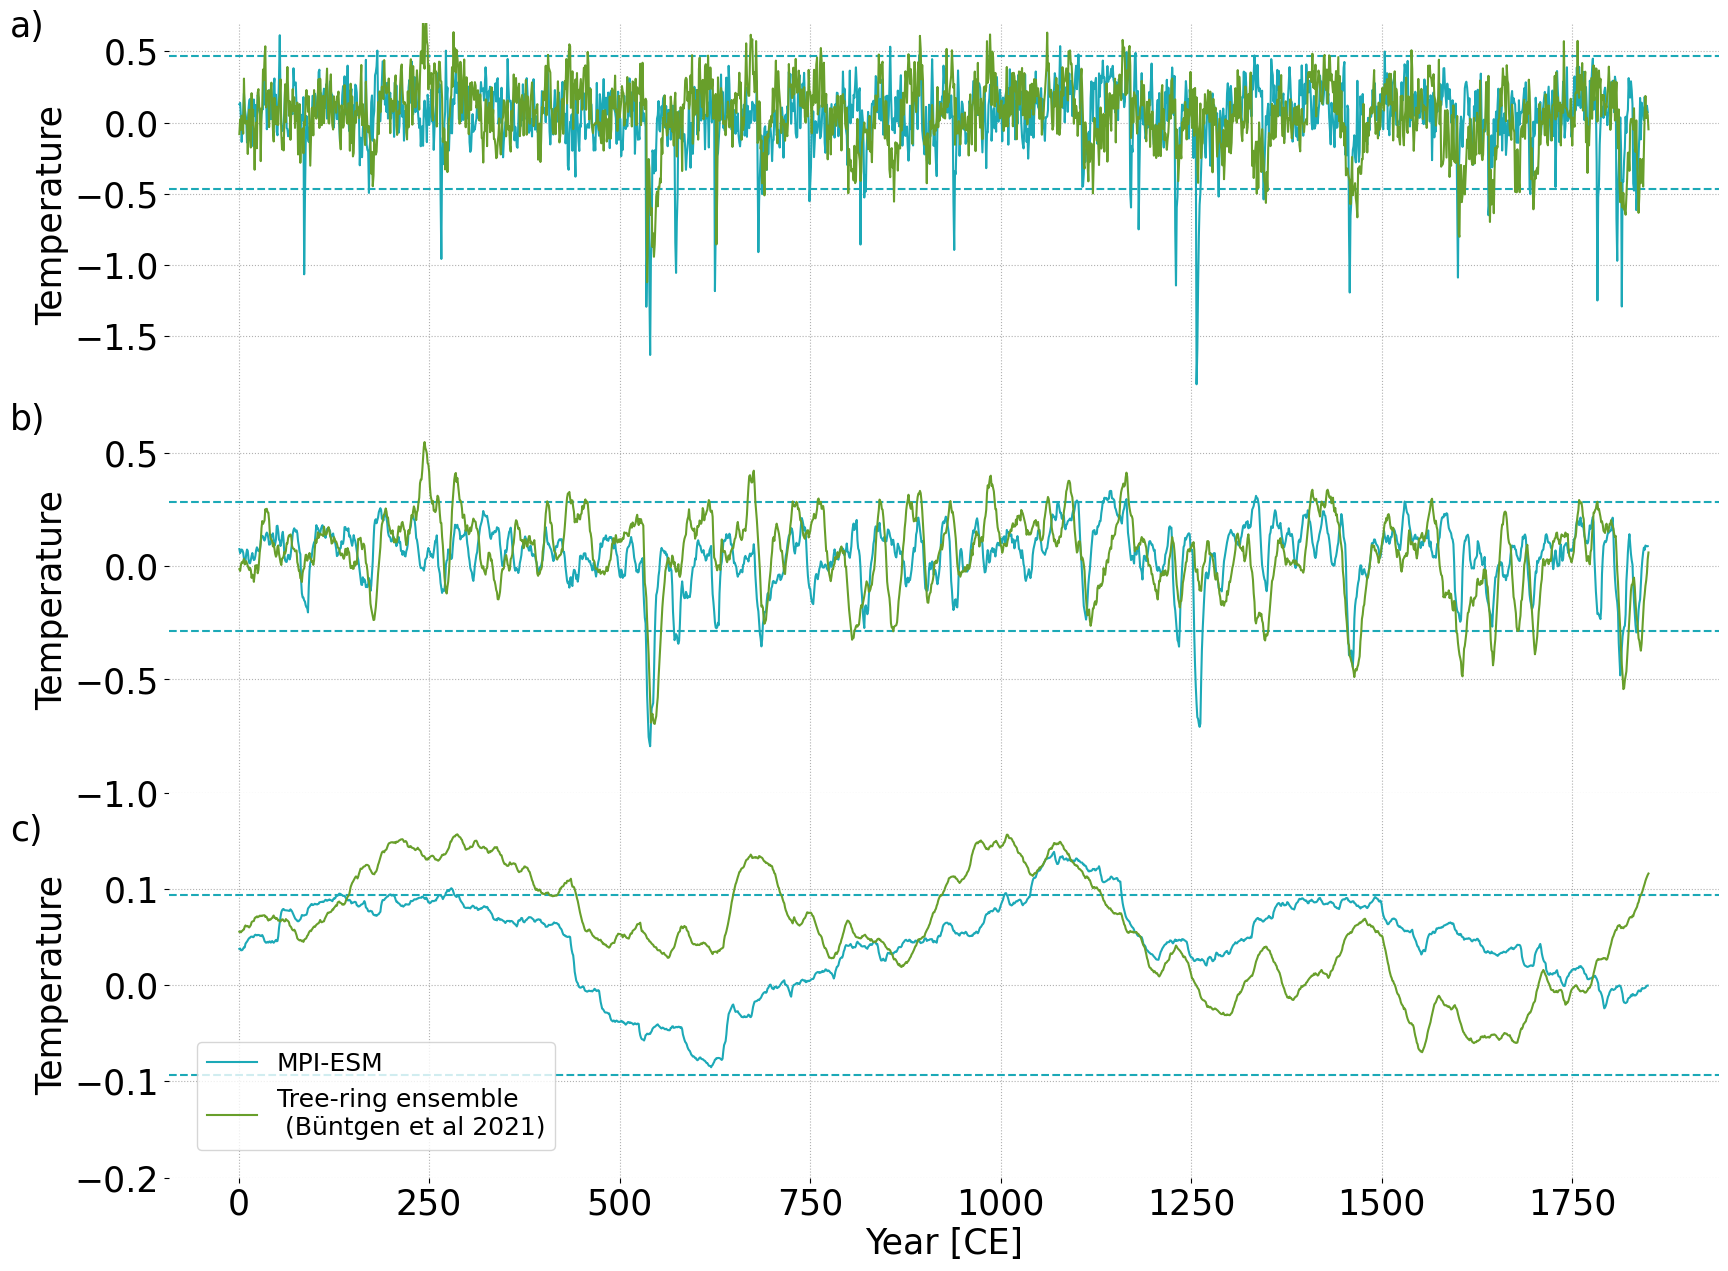

In [29]:
# Figure Buntgen vs model temperature anomalies for annual, decadal, and 200-year means

fig, ax = plt.subplots(3,figsize=(20,15), sharex=False)
fig.subplots_adjust(hspace = 0.0)

x_volc = []
y_volc = []

#------------------------------------------- Annual mean ------------------------------------------------

ax[0].plot(time[-1849:], tas_JJA_a[-1849:], color='#1ca9b7', label='MPI-ESM')
ax[0].axhline(0-tas_JJA_a_std*2, color='#1ca9b7', linestyle='dashed')
ax[0].axhline(0+tas_JJA_a_std*2, color='#1ca9b7', linestyle='dashed')

ax[0].set_ylim(-2,0.7)
ax[0].set_ylabel('Temperature', fontsize=25)
ax[0].tick_params(labelsize=25)
#ax[0].set_xticks([])
ax[0].set_yticks([-1.5,-1,-0.5,0,0.5])
#ax[0].yaxis.set_label_coords(-.06,0.8)

#[t.set_color('#1ca9b7') for t in ax[0].yaxis.get_ticklabels()]

#ax0 = ax[0].twinx()

ax[0].plot(Bun21['YearCE'][:-169], Bun21_a[:-169], color='#689f2b', label='Büntgen21 tree-ring ensemble')

#ax[0].set_ylim(-3,3,1)
#ax[0].set_ylabel('Temperature anomaly [K]', fontsize=18)
#ax[0].tick_params(labelsize=18)
#ax[0].set_yticks([-2,-1,0,1,2])
#ax0.yaxis.set_label_coords(1.07,0.3)

ax[0].grid(linestyle=':')

ax[0].text(-300,0.6,'a)', fontsize=25, color='black')

#ax[0].legend(loc=3, bbox_to_anchor=(0.03,0.01), fontsize=18, frameon=False)

#[t.set_color('#1c5cb7') for t in ax0.yaxis.get_ticklabels()]

#---------------------------------------------- 10 year mean ---------------------------------------------
#ax2 = ax[0].twinx()

ax[1].plot(time[-1849:], tas_JJA_a_10yr[-1849:], color='#1ca9b7')
ax[1].axhline(0-tas_JJA_a_10yr_std*2, color='#1ca9b7', linestyle='dashed')
ax[1].axhline(0+tas_JJA_a_10yr_std*2, color='#1ca9b7', linestyle='dashed')

ax[1].set_ylim(-1,.7)
ax[1].set_ylabel('Temperature', fontsize=25)
ax[1].set_yticks([-1.0,-0.5,0,0.5])
ax[1].tick_params(labelsize=25)
#ax[1].yaxis.set_label_coords(-.06,0.75)
#ax[1].set_xticks([])

#ax[1].legend(loc=3, bbox_to_anchor=(0.05,0.9), fontsize=15, frameon=False)

#[t.set_color('#2a1cb7') for t in ax[1].yaxis.get_ticklabels()]

#ax1 = ax[1].twinx()

ax[1].plot(Bun21['YearCE'][:-169], Bun21_a_10yr[:-169], color='#689f2b')

#ax1.set_ylim(-1.5,1.5)
#ax1.set_ylabel('Temperature anomaly [K]', fontsize=18)
#ax1.set_yticks([-1,0,1])
#ax1.tick_params(labelsize=18)
#ax1.yaxis.set_label_coords(1.07,0.3)

ax[1].grid(linestyle=':')

ax[1].text(-300,0.6,'b)', fontsize=25, color='black')

#ax1.legend(loc=3, bbox_to_anchor=(0.85,0.05), fontsize=15, frameon=False)

#[t.set_color('#771cb7') for t in ax1.yaxis.get_ticklabels()]

#--------------------------------------------- 100 year mean -----------------------------------------------

ax[2].plot(time[-1849:], tas_JJA_a_200yr[-1849:], color='#1ca9b7', label='MPI-ESM')
ax[2].axhline(0-tas_JJA_a_200yr_std*2, color='#1ca9b7', linestyle='dashed')
ax[2].axhline(0+tas_JJA_a_200yr_std*2, color='#1ca9b7', linestyle='dashed')

ax[2].set_ylim(-0.2,0.2)
ax[2].set_ylabel('Temperature', fontsize=25)
ax[2].set_yticks([-0.2,-0.1,0,0.1])
ax[2].tick_params(labelsize=25)

ax[2].plot(Bun21['YearCE'][:-169], Bun21_a_200yr[:-169], color='#689f2b', label='Tree-ring ensemble \n (Büntgen et al 2021)')

#ax[2].axhline(-0.19, xmin=0.54,xmax=0.58, color='#eece1a', linewidth=5, label='solar minima \n (Brehm et al., 2021)')
#ax[2].axhline(-0.19, xmin=0.67,xmax=0.715, color='#eece1a', linewidth=5)
#ax[2].axhline(-0.19, xmin=0.745,xmax=0.81, color='#eece1a', linewidth=5)
#ax[2].axhline(-0.19, xmin=0.84,xmax=0.87, color='#eece1a', linewidth=5)
#ax[2].axhline(-0.19, xmin=0.94,xmax=0.96, color='#eece1a', linewidth=5)

ax[2].scatter(x_volc,y_volc,s=50,marker='^',color='#9F2B68')

ax[2].set_xlabel('Year [CE]', fontsize=25)

ax[2].legend(loc=3, bbox_to_anchor=(0.01,0.04), fontsize=18, frameon=True)

ax[2].grid(linestyle=':')

ax[2].text(-300,0.15,'c)', fontsize=25, color='black')

#[t.set_color('#b71c5c') for t in ax2.yaxis.get_ticklabels()]

sns.despine(left=True, bottom=True, right=True)

#plt.savefig('figures/tas_Bun21_MPI_1750-1850an.png', bbox_inches = 'tight')

plt.show()